In [179]:
import numpy as np
from scipy import fftpack as fp
from scipy import signal
import pandas as pd

import matplotlib.pyplot as plt

# Intro

In this file we explore the effects of different windows

## Rectangular Window

0.5
5000.0


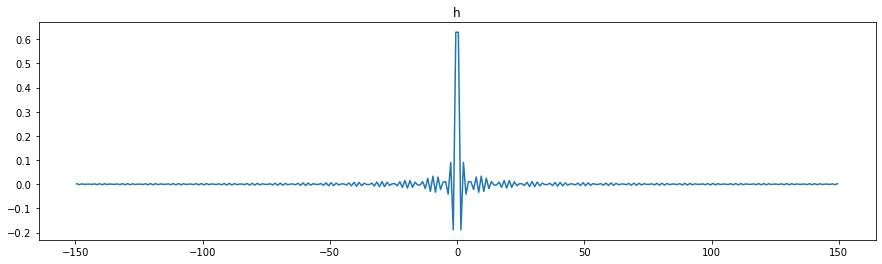

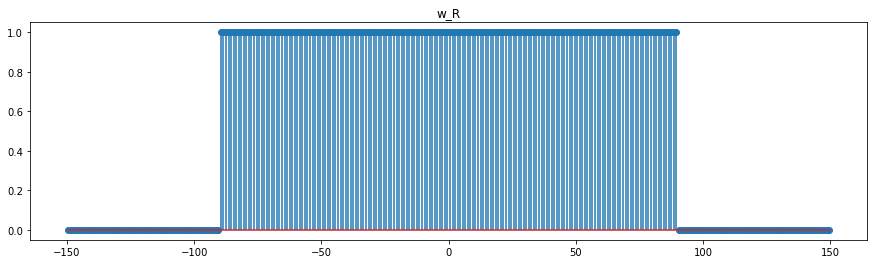

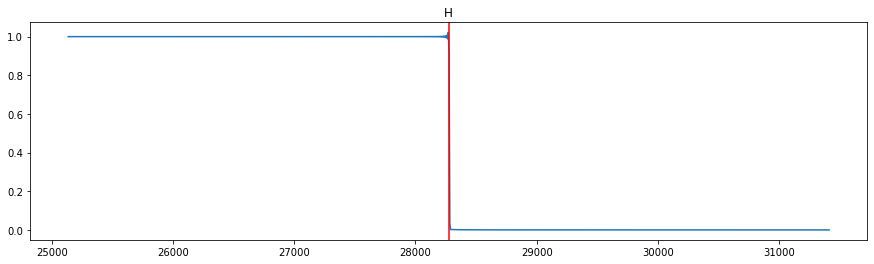

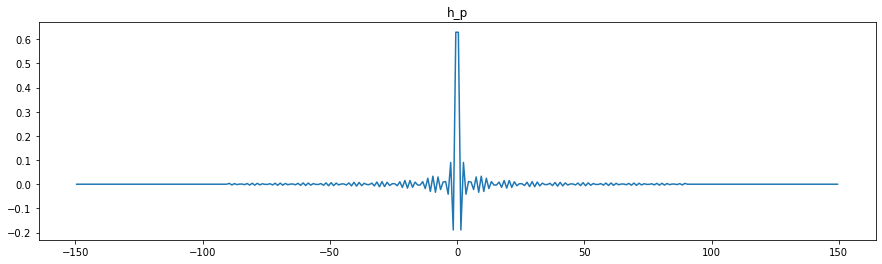

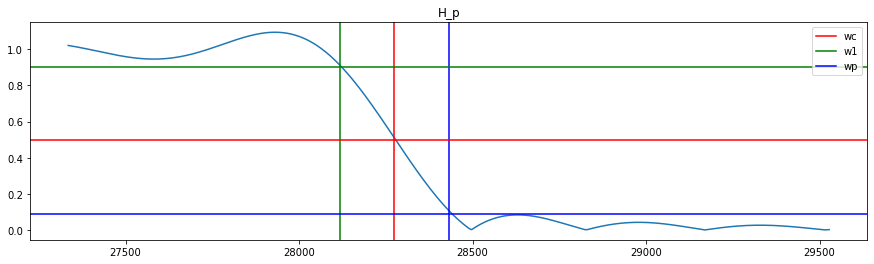

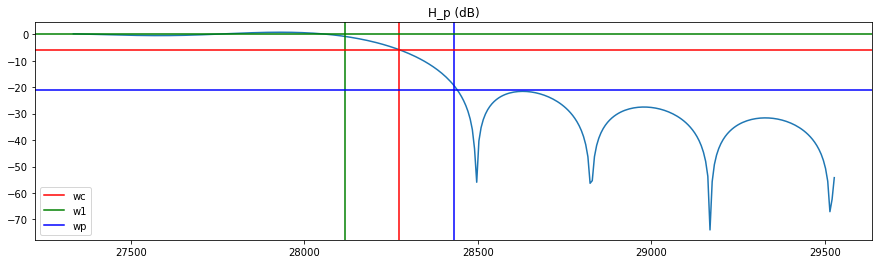

In [3]:
fs = 10_000    # Sampling Frequency
N = 10_000

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 1.8π/(L+1)
TranBW = 50                  # Desired Transition Bandwidth
L = int(1.8*fs/(2 *TranBW))   # Length of Rectangular Window


ws = 2*np.pi*fs # Sampling Frequency in Radians
T = 1/fs        # Sampling Period


fc = 4_500            # Corner Frequency of LPF

wc = 2 * np.pi * fc   # Corner Frequency in Radians

n = np.linspace(-N/2, N/2, N)    # To make things symmetrical, we start from -nT to nT

print(N*T/2)
print(fs/2)
f = np.linspace(0, ws , N)      # Create an array for frequencies up to the sampling frequency


# Here, we define the LPF in the time domain
h = np.zeros(N)
for i in range(N):
    if(n[i] == 0):    # When n = 0, we use l'hopital's rule to define h = cos(wcTN)wcT/π
        h[i] = 2*wc/ws
    else:
        h[i] = np.sin(wc * T * n[i])/(n[i] * np.pi)

        
#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------


# Here we graph h(nT)
plt.figure().set_figwidth(15)
plt.title('h')
plt.plot(n[LEFT:RIGHT], h[LEFT:RIGHT])           
plt.show()

wR = np.zeros(n.size)
lim = L/2

for i in (range(n.size)):
    if((n[i] > -lim) and (n[i] < lim)):
        wR[i] = 1


plt.figure().set_figwidth(15)
plt.stem(n[LEFT:RIGHT], wR[LEFT:RIGHT])
plt.title('w_R')
plt.show()    

# Get the Frequency domain representation of the LPF
H = np.abs(np.fft.fft(h))

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 1000
LEFT = N//2 - WIDTH
RIGHT = N//2
#-----------------------------------------------------------------------------------------

plt.figure().set_figwidth(15)
plt.title('H')
plt.plot(f[LEFT:RIGHT], H[LEFT:RIGHT])
plt.axvline(wc, color ='r', label = 'fc')
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

h_p = h * wR

plt.figure().set_figwidth(15)
plt.plot(n[LEFT:RIGHT], h_p[LEFT:RIGHT])
plt.title('h_p')
plt.show()

H_p = np.abs(np.fft.fft(h_p))
#H_p = H_p / H_p[0]

plt.figure().set_figwidth(15)
plt.title('H_p')

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT =  29*WIDTH
RIGHT = N//2 - 2*WIDTH
#-----------------------------------------------------------------------------------------


plt.plot(f[LEFT:RIGHT],(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*50), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(0.08912509381337455, color='b')
plt.axhline(0.5, color='r')
plt.axhline(0.9, color='g')
plt.legend() 
plt.show()

plt.figure().set_figwidth(15)
plt.title('H_p (dB)')
plt.plot(f[LEFT:RIGHT],20*np.log10(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*50), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(20 * np.log10(0.08912509381337455), color='b')
plt.axhline(20 * np.log10(0.5), color='r')
plt.axhline(0, color='g')
plt.legend() 
plt.show()

In [4]:
ripple = 0.7416

ripple = 10**(ripple/20)
print(ripple)
print(1/ripple)

print(10**(-21/20))

1.0891307001454542
0.918163448947357
0.08912509381337455


# Bartlett Window

L = 305
0.5
5000.0


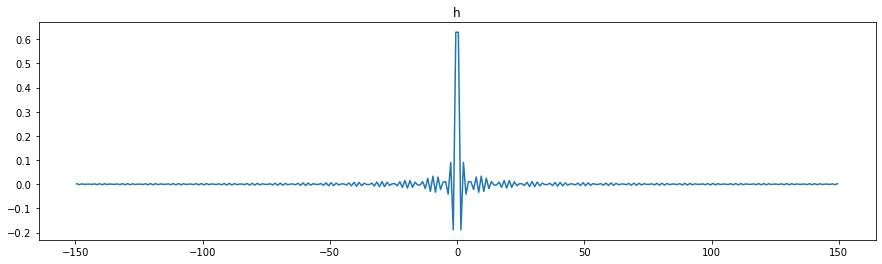

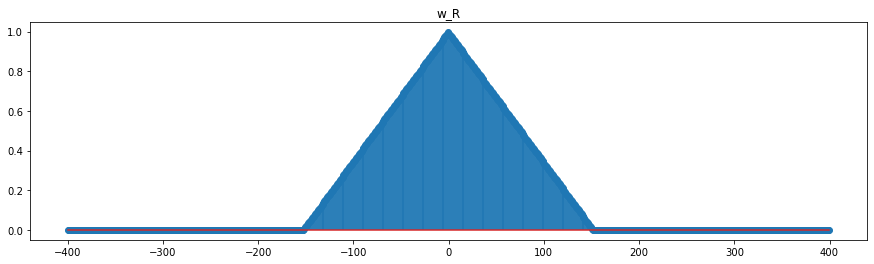

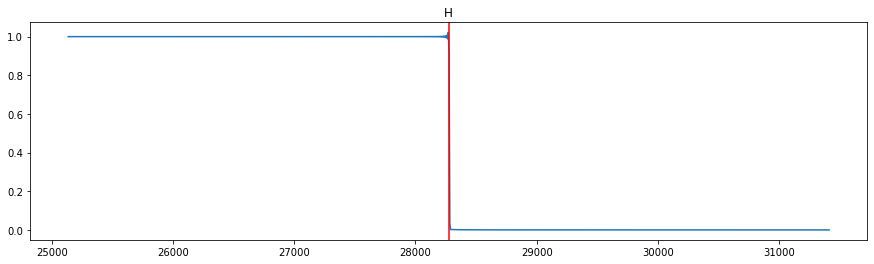

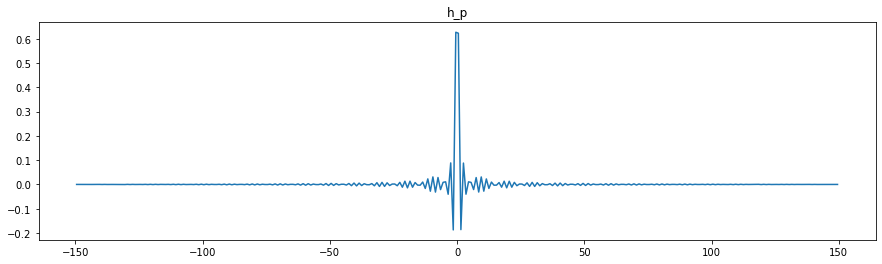

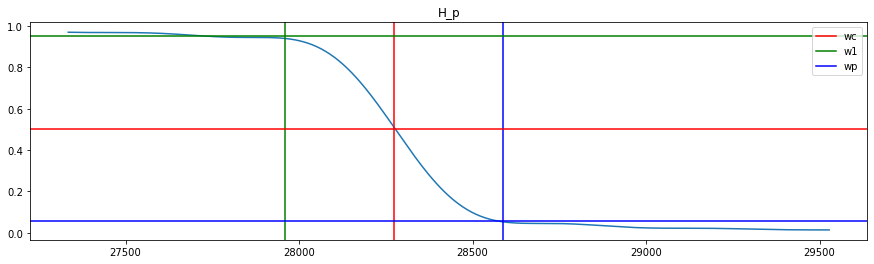

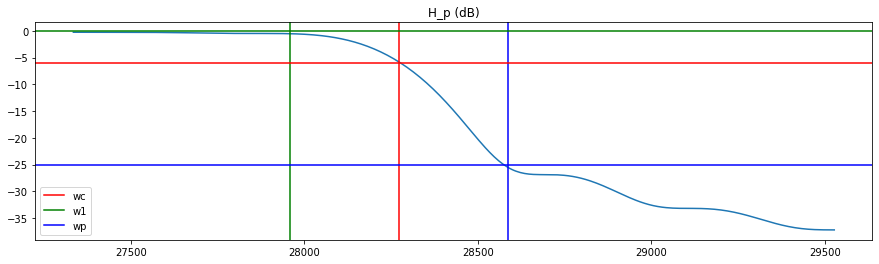

In [5]:
fs = 10_000    # Sampling Frequency
N = 10_000

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 6.1π/(L+1)
TranBW = 100                  # Desired Transition Bandwidth
L = int(6.1*fs/(2 *TranBW))   # Length of Rectangular Window
print(f'L = {L}')

ws = 2*np.pi*fs # Sampling Frequency in Radians
T = 1/fs        # Sampling Period


fc = 4_500            # Corner Frequency of LPF

wc = 2 * np.pi * fc   # Corner Frequency in Radians

n = np.linspace(-N/2, N/2, N)    # To make things symmetrical, we start from -nT to nT

print(N*T/2)
print(fs/2)
f = np.linspace(0, ws , N)      # Create an array for frequencies up to the sampling frequency


# Here, we define the LPF in the time domain
h = np.zeros(N)
for i in range(N):
    if(n[i] == 0):    # When n = 0, we use l'hopital's rule to define h = cos(wcTN)wcT/π
        h[i] = 2*wc/ws
    else:
        h[i] = np.sin(wc * T * n[i])/(n[i] * np.pi)

        
#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------


# Here we graph h(nT)
plt.figure().set_figwidth(15)
plt.title('h')
plt.plot(n[LEFT:RIGHT], h[LEFT:RIGHT])           
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 400
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 1.8π/(L+1)
wR = np.zeros(n.size)
lim = L/2

for i in (range(n.size)):
    if((n[i] > -lim) and (n[i] < 0)): # upward slope
        wR[i] = wR[i-1] + (2/L)
    elif((n[i] < lim) and (n[i] > 0)): # downward slope
        wR[i] = wR[i-1] - (2/L)

plt.figure().set_figwidth(15)
plt.stem(n[LEFT:RIGHT], wR[LEFT:RIGHT])
plt.title('w_R')
plt.show()    

# Get the Frequency domain representation of the LPF
H = np.abs(np.fft.fft(h))

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 1000
LEFT = N//2 - WIDTH
RIGHT = N//2
#-----------------------------------------------------------------------------------------

plt.figure().set_figwidth(15)
plt.title('H')
plt.plot(f[LEFT:RIGHT], H[LEFT:RIGHT])
plt.axvline(wc, color ='r', label = 'fc')
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

h_p = h * wR

plt.figure().set_figwidth(15)
plt.plot(n[LEFT:RIGHT], h_p[LEFT:RIGHT])
plt.title('h_p')
plt.show()

H_p = np.abs(np.fft.fft(h_p))
#H_p = H_p / H_p[0]

plt.figure().set_figwidth(15)
plt.title('H_p')

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT =  29*WIDTH
RIGHT = N//2 - 2*WIDTH
#-----------------------------------------------------------------------------------------

plt.plot(f[LEFT:RIGHT],(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(10 ** (-25/20), color='b')
plt.axhline(0.5, color='r')
plt.axhline(0.95, color='g')
plt.legend() 
plt.show()


plt.figure().set_figwidth(15)
plt.title('H_p (dB)')
plt.plot(f[LEFT:RIGHT],20*np.log10(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(-25, color='b')
plt.axhline(20 * np.log10(0.5), color='r')
plt.axhline(0, color='g')
plt.legend() 
plt.show()

## Hann Window

L = 310
0.5
5000.0


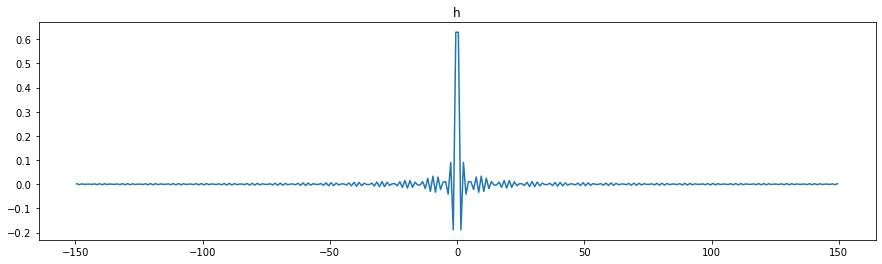

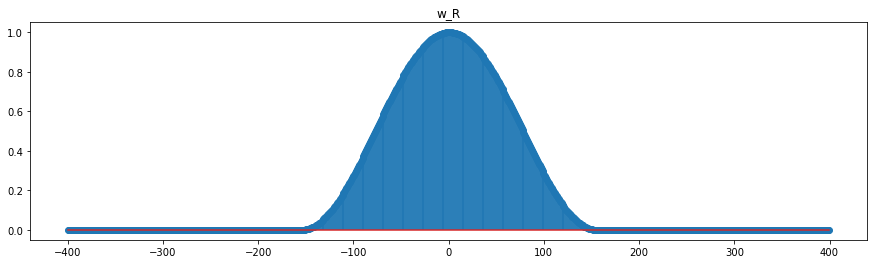

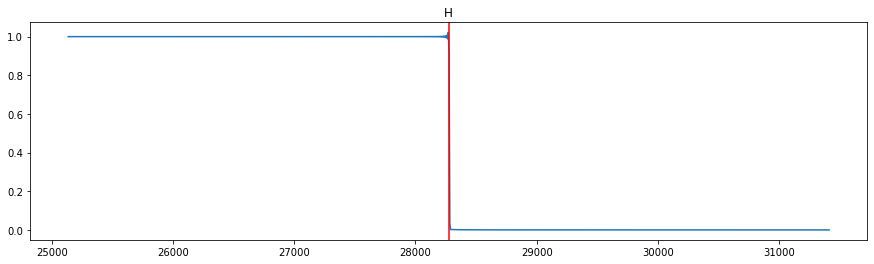

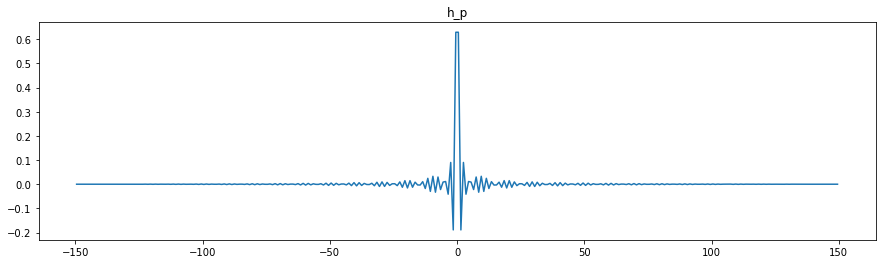

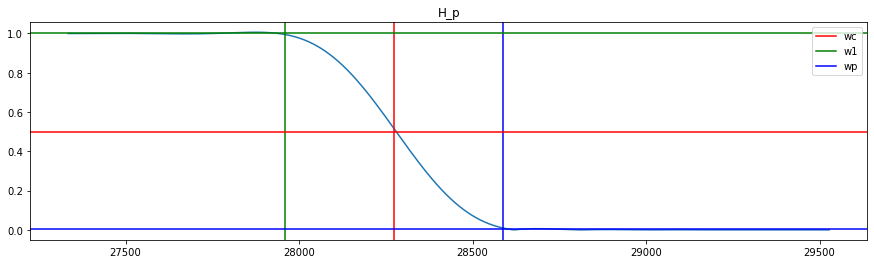

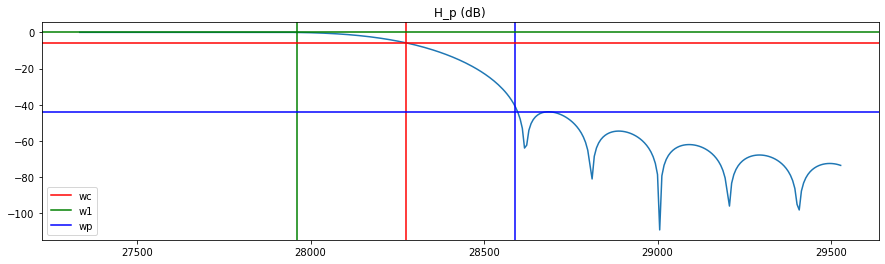

In [6]:
fs = 10_000    # Sampling Frequency
N = 10_000

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 6.1π/(L+1)
TranBW = 100                  # Desired Transition Bandwidth
L = int(6.2*fs/(2 *TranBW))   # Length of Rectangular Window
print(f'L = {L}')

ws = 2*np.pi*fs # Sampling Frequency in Radians
T = 1/fs        # Sampling Period


fc = 4_500            # Corner Frequency of LPF

wc = 2 * np.pi * fc   # Corner Frequency in Radians

n = np.linspace(-N/2, N/2, N)    # To make things symmetrical, we start from -nT to nT

print(N*T/2)
print(fs/2)
f = np.linspace(0, ws , N)      # Create an array for frequencies up to the sampling frequency


# Here, we define the LPF in the time domain
h = np.zeros(N)
for i in range(N):
    if(n[i] == 0):    # When n = 0, we use l'hopital's rule to define h = cos(wcTN)wcT/π
        h[i] = 2*wc/ws
    else:
        h[i] = np.sin(wc * T * n[i])/(n[i] * np.pi)

        
#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------


# Here we graph h(nT)
plt.figure().set_figwidth(15)
plt.title('h')
plt.plot(n[LEFT:RIGHT], h[LEFT:RIGHT])           
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 400
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 1.8π/(L+1)
wR = np.zeros(n.size)
lim = L/2

first = True
newIndex = 0
for i in (range(n.size)):
    if((n[i] > -lim) and (n[i] < lim)): 
        if(first):
            newIndex = i + L/2
            first = False
        m = i - newIndex
        wR[i] = (1 + np.cos(2 * np.pi * m/L))/2
    

plt.figure().set_figwidth(15)
plt.stem(n[LEFT:RIGHT], wR[LEFT:RIGHT])
plt.title('w_R')
plt.show()    

# Get the Frequency domain representation of the LPF
H = np.abs(np.fft.fft(h))

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 1000
LEFT = N//2 - WIDTH
RIGHT = N//2
#-----------------------------------------------------------------------------------------

plt.figure().set_figwidth(15)
plt.title('H')
plt.plot(f[LEFT:RIGHT], H[LEFT:RIGHT])
plt.axvline(wc, color ='r', label = 'fc')
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

h_p = h * wR

plt.figure().set_figwidth(15)
plt.plot(n[LEFT:RIGHT], h_p[LEFT:RIGHT])
plt.title('h_p')
plt.show()

H_p = np.abs(np.fft.fft(h_p))
#H_p = H_p / H_p[0]

plt.figure().set_figwidth(15)
plt.title('H_p')

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT =  29*WIDTH
RIGHT = N//2 - 2*WIDTH
#-----------------------------------------------------------------------------------------

plt.plot(f[LEFT:RIGHT],(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(10 ** (-44/20), color='b')
plt.axhline(0.5, color='r')
plt.axhline(1, color='g')
plt.legend() 
plt.show()


plt.figure().set_figwidth(15)
plt.title('H_p (dB)')
plt.plot(f[LEFT:RIGHT],20*np.log10(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(-44, color='b')
plt.axhline(20 * np.log10(0.5), color='r')
plt.axhline(0, color='g')
plt.legend() 
plt.show()

## Hamming

L = 330
0.5
5000.0


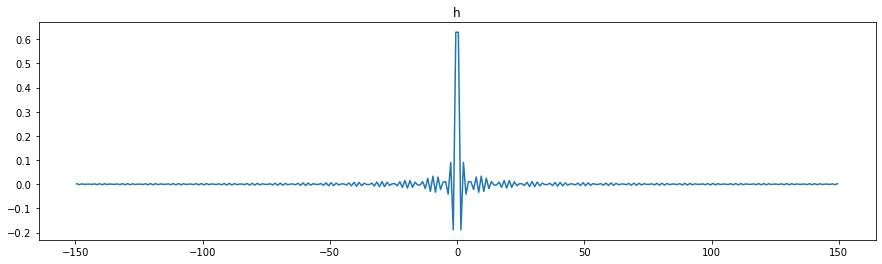

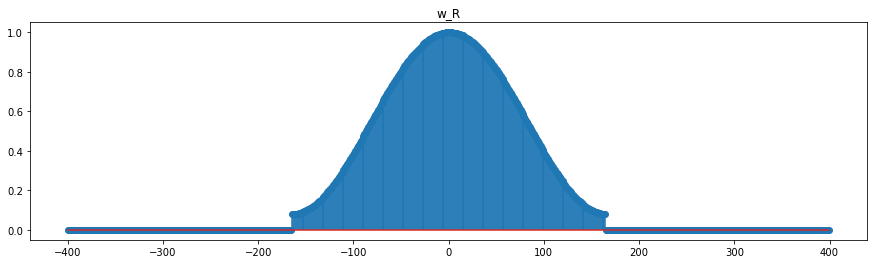

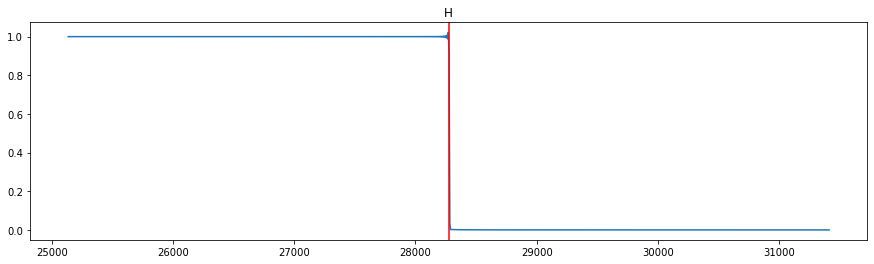

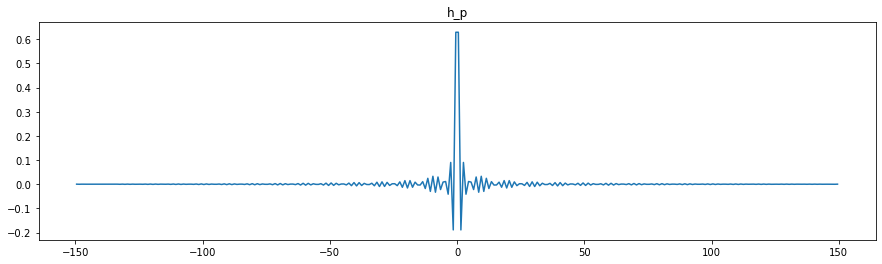

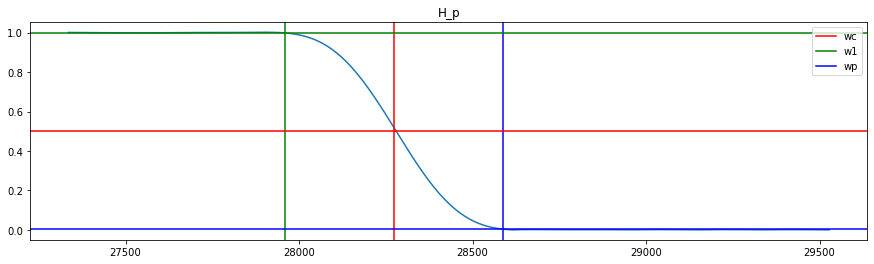

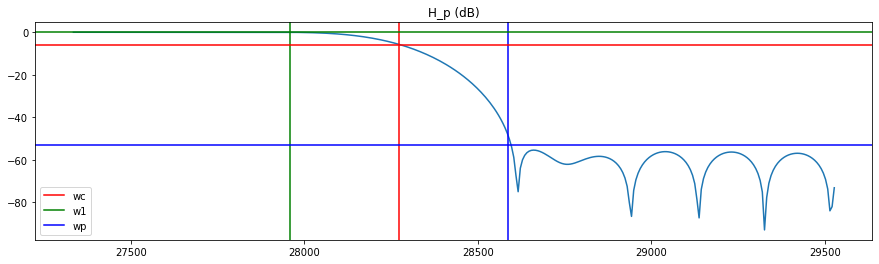

In [7]:
fs = 10_000    # Sampling Frequency
N = 10_000

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 6.1π/(L+1)
TranBW = 100                  # Desired Transition Bandwidth
L = int(6.6*fs/(2 *TranBW))   # Length of Rectangular Window
print(f'L = {L}')

ws = 2*np.pi*fs # Sampling Frequency in Radians
T = 1/fs        # Sampling Period


fc = 4_500            # Corner Frequency of LPF

wc = 2 * np.pi * fc   # Corner Frequency in Radians

n = np.linspace(-N/2, N/2, N)    # To make things symmetrical, we start from -nT to nT

print(N*T/2)
print(fs/2)
f = np.linspace(0, ws , N)      # Create an array for frequencies up to the sampling frequency


# Here, we define the LPF in the time domain
h = np.zeros(N)
for i in range(N):
    if(n[i] == 0):    # When n = 0, we use l'hopital's rule to define h = cos(wcTN)wcT/π
        h[i] = 2*wc/ws
    else:
        h[i] = np.sin(wc * T * n[i])/(n[i] * np.pi)

        
#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------


# Here we graph h(nT)
plt.figure().set_figwidth(15)
plt.title('h')
plt.plot(n[LEFT:RIGHT], h[LEFT:RIGHT])           
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 400
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 1.8π/(L+1)
wR = np.zeros(n.size)
lim = L/2

first = True
newIndex = 0
for i in (range(n.size)):
    if((n[i] > -lim) and (n[i] < lim)): 
        if(first):
            newIndex = i + L/2
            first = False
        m = i - newIndex
        wR[i] = 0.54 + 0.46 * np.cos(2*np.pi* m/L)
    

plt.figure().set_figwidth(15)
plt.stem(n[LEFT:RIGHT], wR[LEFT:RIGHT])
plt.title('w_R')
plt.show()    

# Get the Frequency domain representation of the LPF
H = np.abs(np.fft.fft(h))

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 1000
LEFT = N//2 - WIDTH
RIGHT = N//2
#-----------------------------------------------------------------------------------------

plt.figure().set_figwidth(15)
plt.title('H')
plt.plot(f[LEFT:RIGHT], H[LEFT:RIGHT])
plt.axvline(wc, color ='r', label = 'fc')
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

h_p = h * wR

plt.figure().set_figwidth(15)
plt.plot(n[LEFT:RIGHT], h_p[LEFT:RIGHT])
plt.title('h_p')
plt.show()

H_p = np.abs(np.fft.fft(h_p))
#H_p = H_p / H_p[0]

plt.figure().set_figwidth(15)
plt.title('H_p')

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT =  29*WIDTH
RIGHT = N//2 - 2*WIDTH
#-----------------------------------------------------------------------------------------

plt.plot(f[LEFT:RIGHT],(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(10 ** (-53/20), color='b')
plt.axhline(0.5, color='r')
plt.axhline(1, color='g')
plt.legend() 
plt.show()


plt.figure().set_figwidth(15)
plt.title('H_p (dB)')
plt.plot(f[LEFT:RIGHT],20*np.log10(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(-53, color='b')
plt.axhline(20 * np.log10(0.5), color='r')
plt.axhline(0, color='g')
plt.legend() 
plt.show()

## Blackman

L = 550
0.5
5000.0


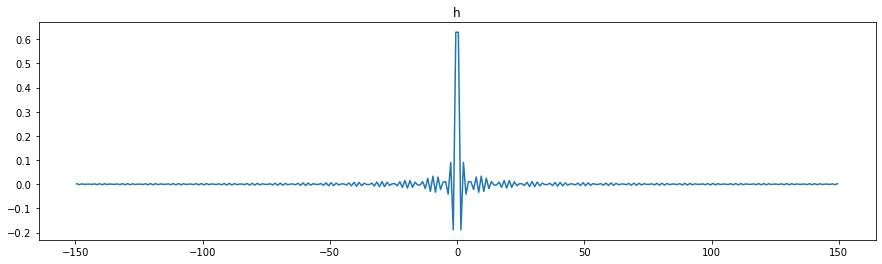

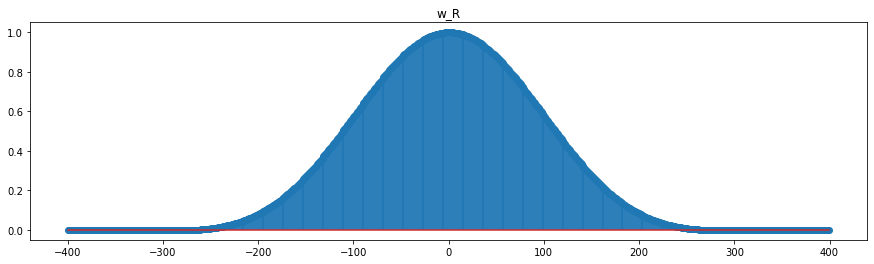

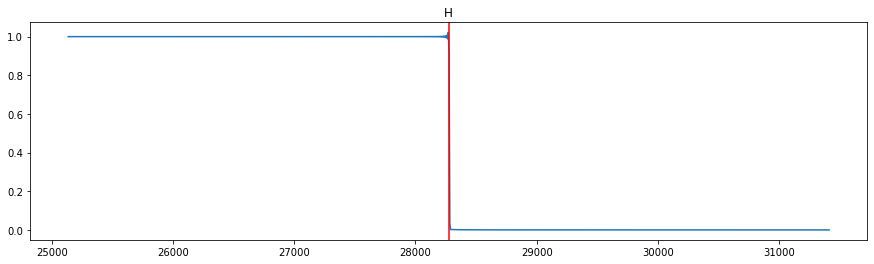

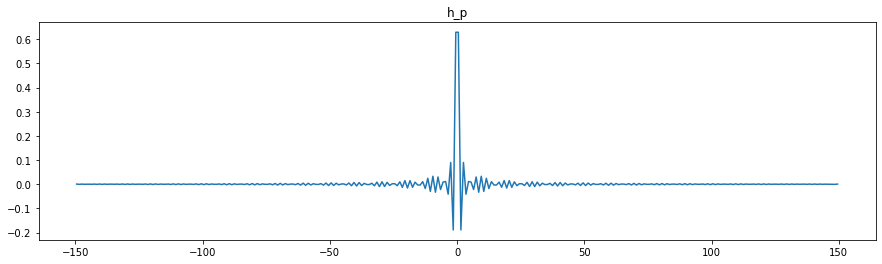

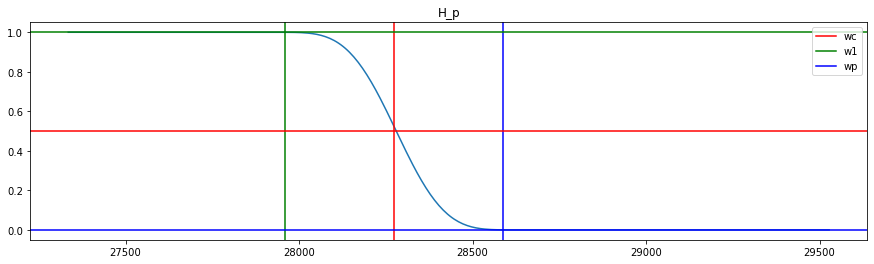

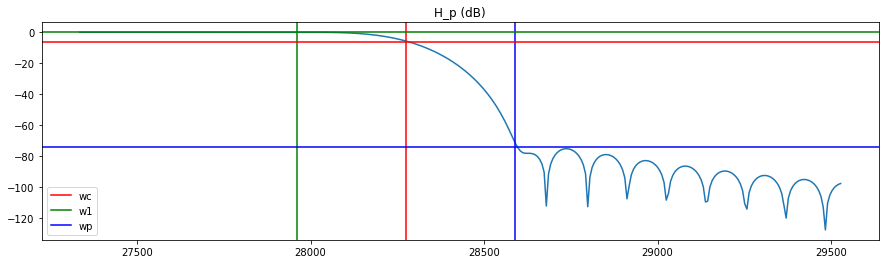

In [8]:
fs = 10_000    # Sampling Frequency
N = 10_000

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 6.1π/(L+1)
TranBW = 100                  # Desired Transition Bandwidth
L = int(11*fs/(2 *TranBW))   # Length of Rectangular Window
print(f'L = {L}')

ws = 2*np.pi*fs # Sampling Frequency in Radians
T = 1/fs        # Sampling Period


fc = 4_500            # Corner Frequency of LPF

wc = 2 * np.pi * fc   # Corner Frequency in Radians

n = np.linspace(-N/2, N/2, N)    # To make things symmetrical, we start from -nT to nT

print(N*T/2)
print(fs/2)
f = np.linspace(0, ws , N)      # Create an array for frequencies up to the sampling frequency


# Here, we define the LPF in the time domain
h = np.zeros(N)
for i in range(N):
    if(n[i] == 0):    # When n = 0, we use l'hopital's rule to define h = cos(wcTN)wcT/π
        h[i] = 2*wc/ws
    else:
        h[i] = np.sin(wc * T * n[i])/(n[i] * np.pi)

        
#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------


# Here we graph h(nT)
plt.figure().set_figwidth(15)
plt.title('h')
plt.plot(n[LEFT:RIGHT], h[LEFT:RIGHT])           
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 400
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 1.8π/(L+1)
wR = np.zeros(n.size)
lim = L/2

first = True
newIndex = 0
for i in (range(n.size)):
    if((n[i] > -lim) and (n[i] < lim)): 
        if(first):
            newIndex = i + L/2
            first = False
        m = i - newIndex
        wR[i] = 0.42 + (0.5 * np.cos(2*np.pi* m/L)) + (0.08 *np.cos(4 * np.pi * m/L))
    

plt.figure().set_figwidth(15)
plt.stem(n[LEFT:RIGHT], wR[LEFT:RIGHT])
plt.title('w_R')
plt.show()    

# Get the Frequency domain representation of the LPF
H = np.abs(np.fft.fft(h))

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 1000
LEFT = N//2 - WIDTH
RIGHT = N//2
#-----------------------------------------------------------------------------------------

plt.figure().set_figwidth(15)
plt.title('H')
plt.plot(f[LEFT:RIGHT], H[LEFT:RIGHT])
plt.axvline(wc, color ='r', label = 'fc')
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

h_p = h * wR

plt.figure().set_figwidth(15)
plt.plot(n[LEFT:RIGHT], h_p[LEFT:RIGHT])
plt.title('h_p')
plt.show()

H_p = np.abs(np.fft.fft(h_p))
#H_p = H_p / H_p[0]

plt.figure().set_figwidth(15)
plt.title('H_p')

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT =  29*WIDTH
RIGHT = N//2 - 2*WIDTH
#-----------------------------------------------------------------------------------------

plt.plot(f[LEFT:RIGHT],(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(10 ** (-74/20), color='b')
plt.axhline(0.5, color='r')
plt.axhline(1, color='g')
plt.legend() 
plt.show()


plt.figure().set_figwidth(15)
plt.title('H_p (dB)')
plt.plot(f[LEFT:RIGHT],20*np.log10(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(-74, color='b')
plt.axhline(20 * np.log10(0.5), color='r')
plt.axhline(0, color='g')
plt.legend() 
plt.show()

## Kaiser Window

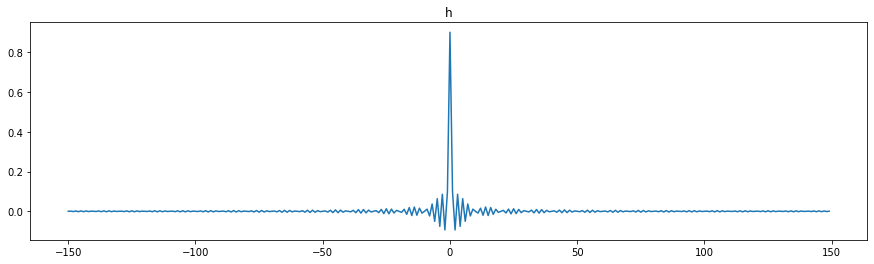

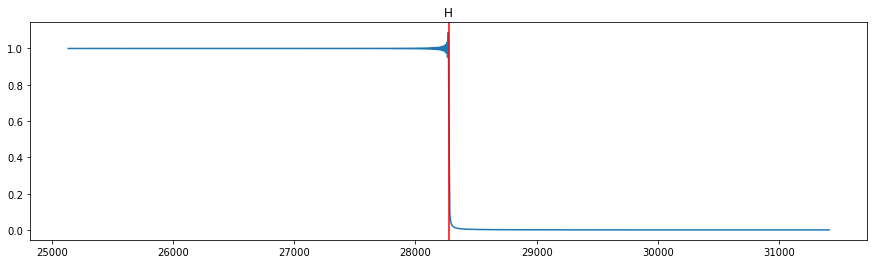

Ap = 0.001
δ2 = 5.756462726124071e-05
Aa = 100.8
δ1 = 9.120108393559096e-06
min delta = 9.120108393559096e-06
new Aa = 100.8
N = 649
5000
i=4676


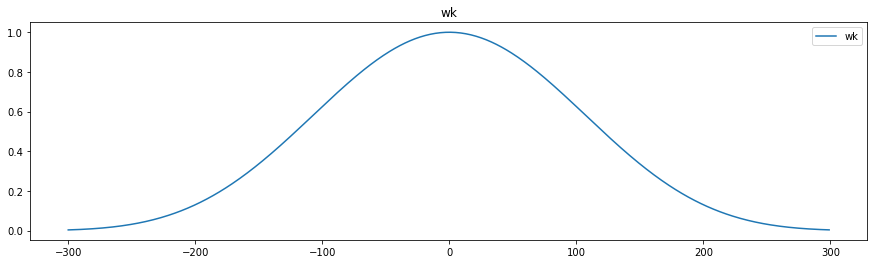

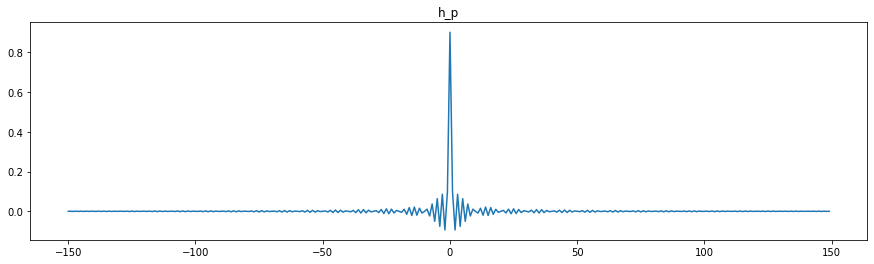

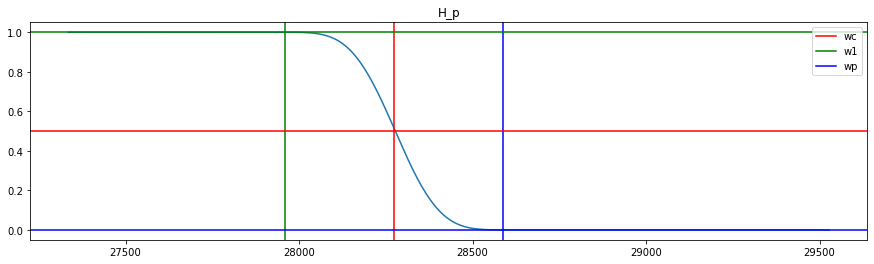

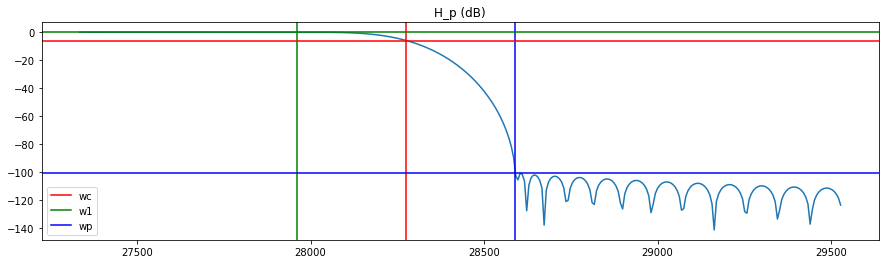

In [9]:
fs = 10_000    # Sampling Frequency
ws = 2*np.pi*fs # Sampling Frequency in Radians
T = 1/fs        # Sampling Period
NN = 10_000     # Total number of samples

n = np.linspace(-(NN-1)//2, (NN-1)//2, NN, dtype='int')
# Define Desired Transition bandwidth in radians
Bt = 2 * np.pi * (100)

fc = 4_500            # Corner Frequency of LPF

wc = 2 * np.pi * fc   # Corner Frequency in Radians

f = np.linspace(0, ws , NN)      # Create an array for frequencies up to the sampling frequency


# Here, we define the LPF in the time domain
h = np.zeros(NN)
for i in range(NN):
    if(n[i] == 0):    # When n = 0, we use l'hopital's rule to define h = cos(wcTN)wcT/π
        h[i] = 2*wc/ws
    else:
        h[i] = np.sin(wc * T * n[i])/(n[i] * np.pi)

        
#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = NN//2 - WIDTH
RIGHT = NN//2 + WIDTH
#-----------------------------------------------------------------------------------------


# Here we graph h(nT)
plt.figure().set_figwidth(15)
plt.title('h')
plt.plot(n[LEFT:RIGHT], h[LEFT:RIGHT])           
plt.show()

# Get the Frequency domain representation of the LPF
H = np.abs(np.fft.fft(h))

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 1000
LEFT = NN//2 - WIDTH
RIGHT = NN//2
#-----------------------------------------------------------------------------------------

plt.figure().set_figwidth(15)
plt.title('H')
plt.plot(f[LEFT:RIGHT], H[LEFT:RIGHT])
plt.axvline(wc, color ='r', label = 'fc')
plt.show()
#----------------------------------------------------------------------------------------------------------

# This one is a bit different as one has to specify the desired Passband and Stopband Ripples first

# Passband Ripple (dB)
Ap = 0.001
print(f'Ap = {Ap}')
delta2 = (10 ** (Ap/20) - 1)/(10 ** (Ap/20) + 1)
print(f'δ2 = {delta2}')
# Stopband Ripple (dB)
Aa = 100.8  # dB
print(f'Aa = {Aa}')
delta1 = 10**(-0.05 *Aa)
print(f'δ1 = {delta1}')

print(f'min delta = {min(delta1, delta2)}')
Aa = -20 * np.log10(min(delta1, delta2))
print(f'new Aa = {Aa}')


# Now we calculate α
if(Aa <= 21):
    alpha = 0
elif(Aa >21 and Aa <= 50):
    alpha = 0.8542 * ((Aa - 21) ** 0.4) + 0.07886*(Aa - 21) 
else: #if (Aa > 50)
    alpha = 0.1102 * (Aa - 8.7)

# Now we calculate D
if(Aa <= 21):
    D = 0.9222
else: #if(Aa > 21)
    D = (Aa - 7.95)/14.36
    
# Now we get N such that N is the lowest odd number satisfying N >= ws*D/Bt, where Bt is the transition bandwidth
# Bt = wa - wp
N = (ws * D/Bt) + 1
if(np.ceil(N) % 2 == 0):
    N = np.ceil(N) + 1
else:
    N = np.ceil(N)
N = int(N) 
print(f'N = {N}')


# Now we define β from α
beta = np.zeros(n.size)
first = True    # Check when we start actually calculating
for i in range(beta.size):
    if((n[i] >= -(N-1)//2) and (n[i] <= (N-1)//2)):
        if(first):
            newIndex = i + (N-1)//2
            print(newIndex)
            first = False
            print(f'i={i}')
        m = i - newIndex
        beta[i] = alpha * np.sqrt(1 - ((2 * m/(N-1))**2))

# Now we define function Io() since our window is defined as Wk = {Io(β)}
#----------------------------------------------------------------------------
def Io(val):
    M = 296  # Iterations since this function would otherwise have infinite
    result = 1
    
    for i in range(1, M):
        result += ((1/np.math.factorial(i)) * ((val/2)** i))**2
    return result
#----------------------------------------------------------------------------


#Since Io(α) is a single value, it should be calculated only once
IoAlpha = Io(alpha)

wk = np.zeros(NN)

for i in range(wk.size):
    if((n[i] >= -(N-1)//2) and (n[i] <= (N-1)//2)):
        wk[i] = Io(beta[i])/IoAlpha

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 300
LEFT =  NN//2 - WIDTH
RIGHT = NN//2 + WIDTH
#-----------------------------------------------------------------------------------------

plt.figure().set_figwidth(15)
plt.title('wk')
plt.plot(n[LEFT:RIGHT], wk[LEFT:RIGHT], label='wk')
#plt.plot(n, beta, label='β')
plt.legend()
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = NN//2 - WIDTH
RIGHT = NN//2 + WIDTH
#-----------------------------------------------------------------------------------------

h_p = h * wk

plt.figure().set_figwidth(15)
plt.plot(n[LEFT:RIGHT], h_p[LEFT:RIGHT])
plt.title('h_p')
plt.show()

H_p = np.abs(np.fft.fft(h_p))
#H_p = H_p / H_p[0]

plt.figure().set_figwidth(15)
plt.title('H_p')


#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT =  29*WIDTH
RIGHT = NN//2 - 2*WIDTH
#-----------------------------------------------------------------------------------------

plt.plot(f[LEFT:RIGHT],(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(Bt/2), color='g', label='w1')
plt.axvline(wc+(Bt/2), color='b', label='wp')
plt.axhline(10 ** (-Aa/20), color='b')
plt.axhline(0.5, color='r')
plt.axhline(1, color='g')
plt.legend() 
plt.show()


plt.figure().set_figwidth(15)
plt.title('H_p (dB)')
plt.plot(f[LEFT:RIGHT],20*np.log10(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(Bt/2), color='g', label='w1')
plt.axvline(wc+(Bt/2), color='b', label='wp')
plt.axhline(-Aa, color='b')
plt.axhline(20 * np.log10(0.5), color='r')
plt.axhline(0, color='g')
plt.legend() 
plt.show()

## Digital Differentiator

Based on the Fourier Transform equations, $ \frac{d^{n}f(t)}{dt^{n}} = (jw)^{n} F(w) $

<div></div>

So to defferientiate a function f(t), it should be brought to the frequency domain $F(w)$ and multiplied by $(jw)^{n}$

<div></div>

We can look at it like this:

$ \frac{d^{n}f(t)}{dt^{n}} = (jw)^{n} F(w) = H(w)F(w) $

Therefore $ H(w) = (jw)^{n}$

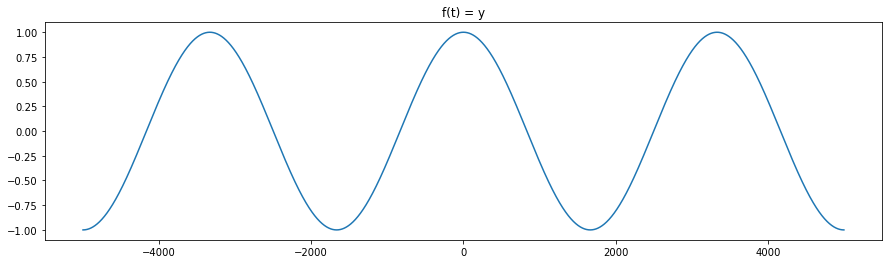

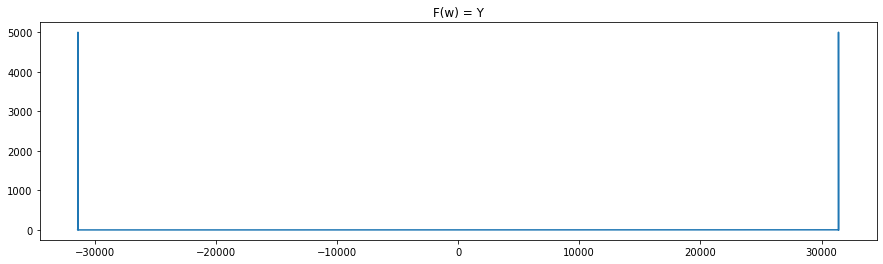

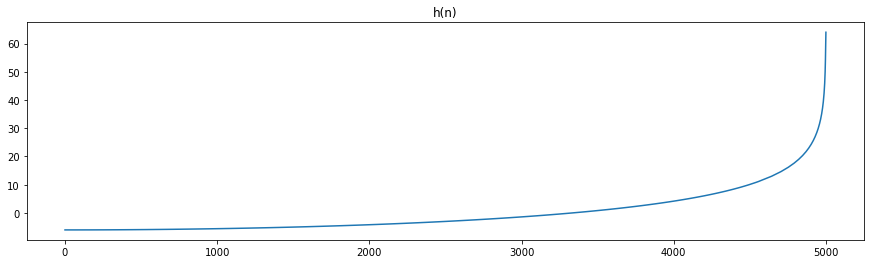

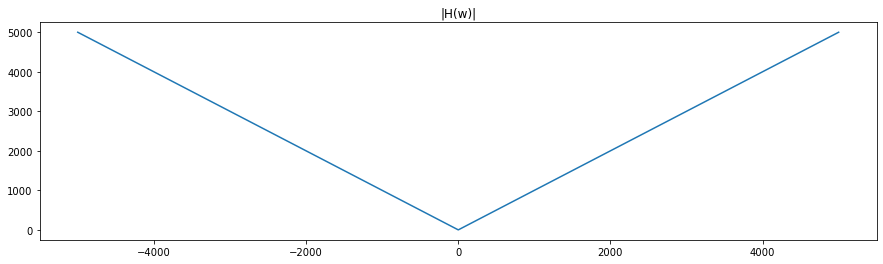

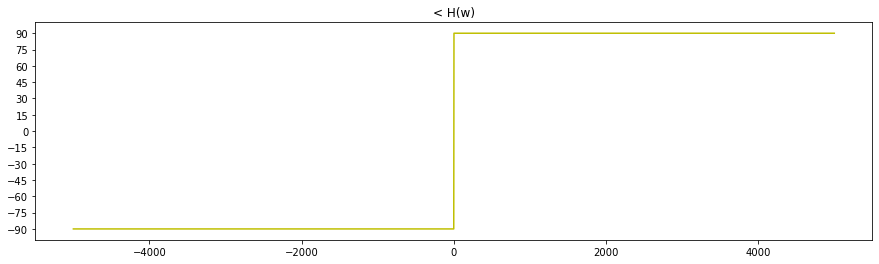

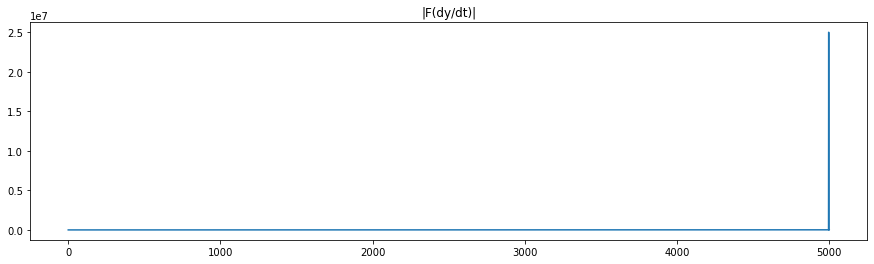

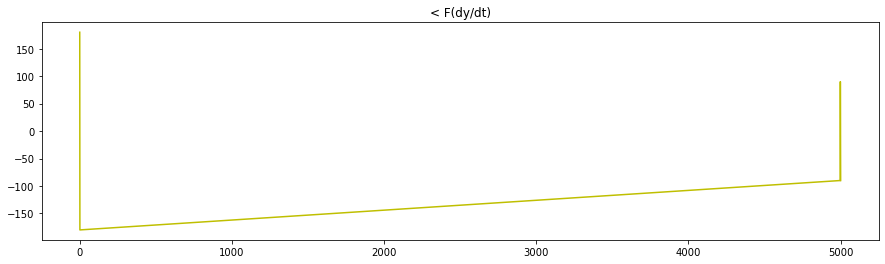

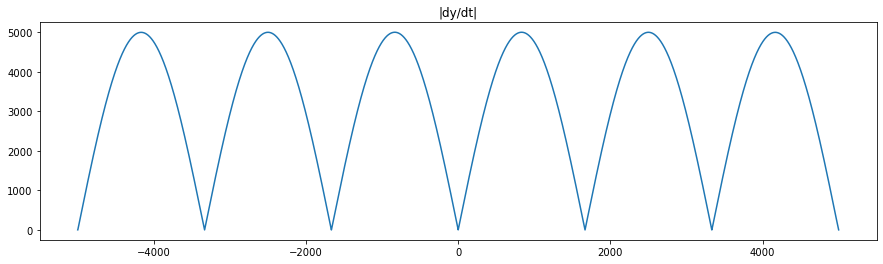

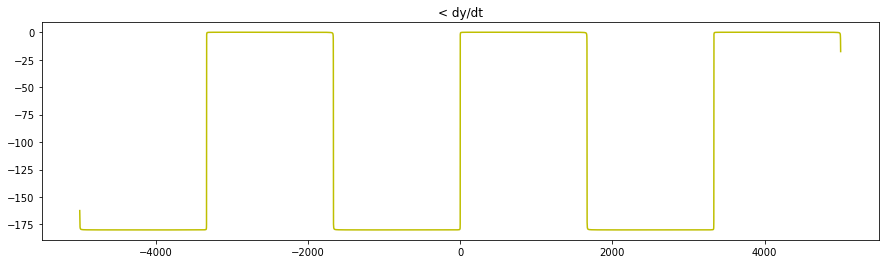

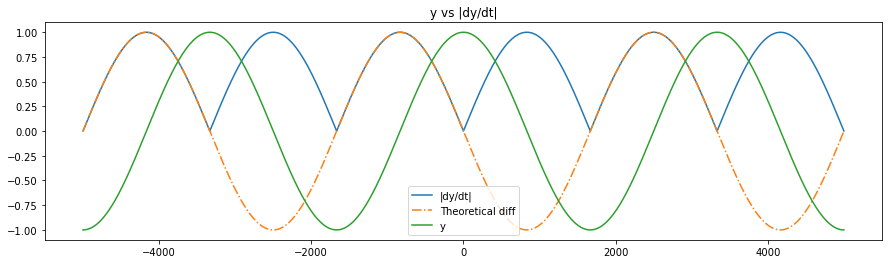

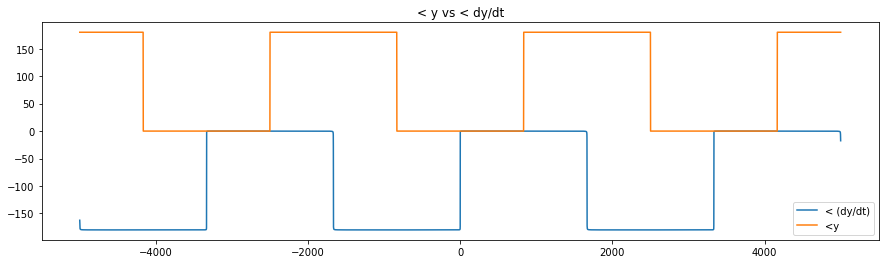

In [178]:
N = 10_000
fs = N # sampling Frequency in Hz
ws = 2 * np.pi * fs
T = 1/fs

fc = 3
wc = 2*np.pi*fc

order = 1
n = np.linspace(-N//2, N//2, N, dtype='int')
f = np.linspace(-ws//2, ws//2, N)
#f(t) = y

y = np.cos(wc*n*T)

plt.figure().set_figwidth(15)
plt.title('f(t) = y')
plt.plot(n, y)
plt.show()

Y = np.fft.fft(y)

plt.figure().set_figwidth(15)
plt.title('F(w) = Y')
plt.plot(f, np.abs(Y))
plt.show()


H = n * complex(0, 1)

h = np.fft.ifft(H)
plt.figure().set_figwidth(15)
plt.title('h(n)')
plt.plot(n[N//2:], 20*np.log10(np.abs(h[N//2:])))
plt.show()

plt.figure().set_figwidth(15)
plt.title('|H(w)|')
plt.plot(n, np.abs(H))
plt.show()

ticks = np.linspace(-120, 120, 17)
plt.figure().set_figwidth(15)
plt.title('< H(w)')
plt.yticks(ticks)
plt.ylim(-100, 100)
plt.plot(n, np.angle(H)*180/np.pi, 'y')
plt.show()


# Now the fun part
difY =  Y * H

# Plot magnitude of difY
plt.figure().set_figwidth(15)
plt.title('|F(dy/dt)|')
plt.plot(n[N//2:], np.abs(difY[N//2:]))
plt.show()

# Plot phase of difY
plt.figure().set_figwidth(15)
plt.title('< F(dy/dt)')
plt.plot(n[N//2:], np.angle(difY[N//2:])*180/np.pi, 'y')
plt.show()

# Now we find the differentiated signal
dify = np.fft.ifft(difY)

MAKE_RESULT_REAL = False
if(MAKE_RESULT_REAL):
    # Bring the signal to the Real domain (Optional)
    for i in range(dify.size):
        if(np.angle(dify[i]) != 0):
            dify[i] = -np.real(dify[i])
        else:
            dify[i] = np.real(dify[i])
        
# Plot the magnitude of dify
plt.figure().set_figwidth(15)
plt.title('|dy/dt|')
plt.plot(n, np.abs(dify))
plt.show()

# Plot phase of difY
plt.figure().set_figwidth(15)
plt.title('< dy/dt')
plt.plot(n, np.angle(dify)*180/np.pi, 'y')
plt.show()

# Now let's compare the original y to dy/dt
they = -np.sin(n*wc*T)
plt.figure().set_figwidth(15)
if(MAKE_RESULT_REAL):
    plt.title('y vs dy/dt')
    plt.plot(n, np.real(dify)/max(dify), label='R(dy/dt)')
else:
    plt.title('y vs |dy/dt|')
    plt.plot(n, np.abs(dify)/max(np.abs(dify)), label='|dy/dt|')
plt.plot(n, they, '-.', label='Theoretical diff')


plt.plot(n, y, label='y')
plt.legend()
plt.show()



angle_norm = 180/np.pi

plt.figure().set_figwidth(15)
plt.title('< y vs < dy/dt')
plt.plot(n, np.angle(dify)* angle_norm, label='< (dy/dt)')
plt.plot(n, np.angle(y) * angle_norm, label='<y')
plt.legend()
plt.show()


## Discrete Cosine Transform

Somwhere I read that a DCT is equivalent to an FFT where the waveform is evenly symmetrical, and twice the size. The DCT is useful for Real data and doesn't bother us with complex numbers.

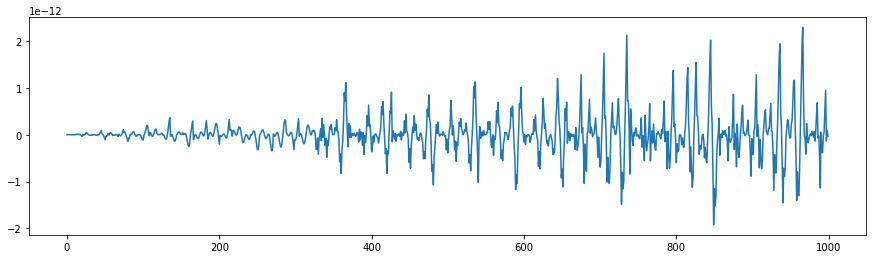

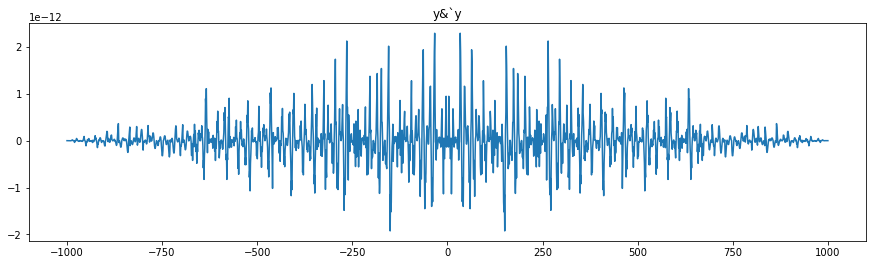

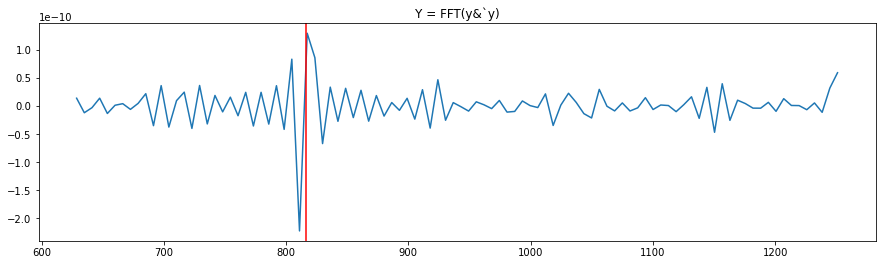

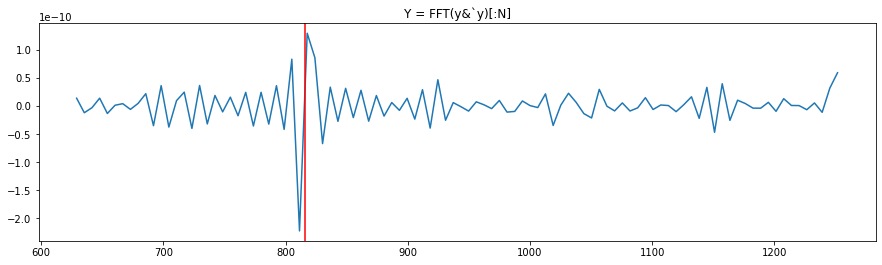

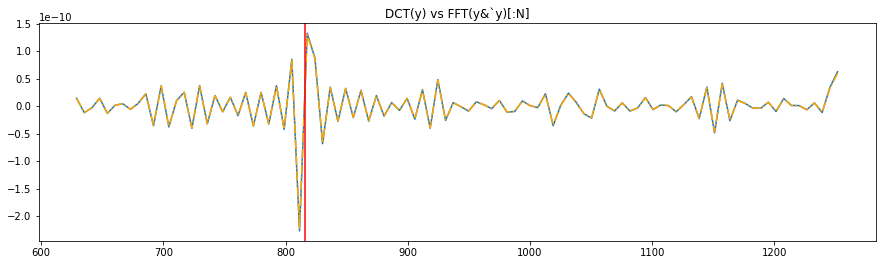

In [271]:
toRads = 2 * np.pi

N = 1000
fs = N
T = 1/fs
ws = fs * toRads

n = np.linspace(0, N-1, N)
f = np.linspace(0, ws, N)

#come up with some frequency components

f1 = (N//2)/5
f2 = (N//2)/7.7




w1 = f1 * toRads
w2 = f2 * toRads


# define a signal
y = np.sin(ws*n*T)*(np.cos(w1 * n * T) + np.sin(w2 * n * T))
plt.figure().set_figwidth(15)
plt.plot(n, y)
plt.show()


p_y = np.append(y, y[::-1])
nn = np.linspace(-N, N, 2 * N)
ff = np.linspace(0, 2*ws, 2*N)

plt.figure().set_figwidth(15)
plt.title('y&`y')
plt.plot(nn, p_y)
plt.show()

LEFT = 100
RIGHT = 200

Y = np.fft.fft(p_y)
plt.figure().set_figwidth(15)
plt.title('Y = FFT(y&`y)')
plt.plot(ff[LEFT:RIGHT], np.real(Y[LEFT:RIGHT]))
plt.axvline(2*w2, color='r')
plt.show()

P_Y = np.real(Y[:N])
plt.figure().set_figwidth(15)
plt.title('Y = FFT(y&`y)[:N]')
plt.plot(f[LEFT:RIGHT], P_Y[LEFT:RIGHT])
plt.axvline(2*w2, color='r')
plt.show()

dctY = fp.dct(y, norm=None)
plt.figure().set_figwidth(15)
plt.title('DCT(y) vs FFT(y&`y)[:N]')
plt.plot(f[LEFT:RIGHT], dctY[LEFT:RIGHT])
plt.plot(f[LEFT:RIGHT], P_Y[LEFT:RIGHT], '-.', c='orange')
plt.axvline(2*w2, color='r')
plt.show()


